<a href="https://colab.research.google.com/github/gmmendez/EA2SOA/blob/master/EA3_Mendez_Gonzalo_39913544_Ejercicio1_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Introduccion**

La *dotación de riego* es una medida usada para calcular, teóricamente, cuanta superficie se podría regar en función del agua disponible y se expresa en milímetros por hectárea por hora. Da una idea aproximada sobre cuanta superficie se podría regar, o sea las posibilidades reales de riego. Se obtiene dividiendo el caudal disponible expresado en litros por segundo por 2,78 (un coeficiente para convertir las unidades utilizadas).

Supongamos que disponemos de una bomba eléctrica monofásica que arroja 4.000 litros por hora que equivalen a 1,11 lts/seg (4.000/3.600 segundos = 1,11 litros por segundo). Para convertir esta medida en dotación de riego se divide la cantidad de litros que expende la bomba por segundo por 2,78



> *Dotación de riego = cantidad de litros por segundo / 2,78*



> *Dotación de riego = 1,11 lts / 2,78 = 0,4 mm/Ha/h.*


De esta forma, se puede establecer cuanto tiempo llevará regar una -o más de una- hectárea(s) dependiento de la cantidad de agua diaria que necesite el cultivo. Supongamos que una hectárea de plantación de soja requiere unos 7 mm de agua diarios, entonces se puede establecer que la cantidad de horas que debe estar en funcionamiento la bomba eléctrica será:



> *Requerimiento / Dotación = 7/0,4 = 17,5 horas (duración diaria de una operación).*

El siguiente ejercicio tiene como objetivo realizar el cálculo de la cantidad de horas que deben mantenerse en funcionamiento distintas bombas eléctricas de agua que se utilizan en hectáreas de diferentes cultivos. El ejercicio simula mediante el vector requerimientoHectarea la cantidad de milímetros de agua que necesita una hectárea de un determinado cultivo, mientras que el vector dotacionBombaAgua simula la cantidad de litros de agua por hora que expende la bomba eléctrica de agua que se utiliza en dicha hectárea, es decir, en la posición 0 del vector dotacionBombaAgua encontraremos la cantidad de litros de agua expendidos por la bomba utilizada en el cultivo de la hectárea que se encuentra en la posición 0 del vector requerimientoHectarea.

A comparación con el ejercicio realizado utilizando la potencia de GPU para ejecutar los cálculos, se puede verificar que la diferencia del tiempo que insume realizar los mismos de forma secuencial -esto es, utilizando una CPU solamente-, es notable, ya que por cada posición de los vectores, se debe realizar un cálculo, y para ejecutar el cálculo de la siguiente posicion, primero debe finalizar el cálculo de la posicion que se está ejecutando actualmente. La diferencia entre utilziar CPU y CPU + GPU se hace más evidente a medida que se aumenta el tamaño de los vectores.

**2. Armado de ambiente**

No es necesario realizar ningun tipo de ejecución previa a la ejecución del ejercicio para armar el ambiente.

**3. Desarrollo**

A continuación se encuentra el código desarrollado para realizar el cálculo de la cantidad de horas que debe estar en funcionamiento cada bomba de agua instalada en las distintas hectareas de cultivo, sin utilizar la potencia de cálculo de GPU, esto es, realizando una ejecución secuencial sobre CPU.

In [ ]:
# --------------------------------------------
#@title 3.1 Parámetros de ejecución { vertical-output: true }

cant_hectareas =   100000#@param {type: "number"}
# --------------------------------------------

from datetime import datetime

tiempo_total = datetime.now()

from random import randint

import numpy


# Definición de función que transforma el tiempo en  milisegundos
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0


#CPU - Defino la memoria de los vectores en cpu.
#vector cantidad de milimetros de agua que requiere el cultivo en la hectarea por dia
requerimientoHectarea_cpu = numpy.random.uniform(low=0.3, high=20, size=(cant_hectareas))
requerimientoHectarea_cpu = requerimientoHectarea_cpu.astype( numpy.float32() )

#vector cantidad de litros de agua por hora que expende la bomba de agua instalada en la hectarea
dotacionBombaAgua_cpu = numpy.random.uniform(low=50, high=10000, size=(cant_hectareas))
dotacionBombaAgua_cpu = dotacionBombaAgua_cpu.astype( numpy.int32() )

#vector resultado
resultado_cpu = numpy.zeros_like( requerimientoHectarea_cpu )

#tiempo_ini_cpu = datetime.now()


# Realizo la función que previamente se ejecutaba en la funcion kernel.

tiempo_bucle = datetime.now()

segundos = 3600
coeficiente = 2.78

for idx in range( 0, cant_hectareas ):
  resultado_cpu[idx] = requerimientoHectarea_cpu[idx] / (dotacionBombaAgua_cpu[idx] / segundos / coeficiente);

tiempo_bucle = datetime.now() - tiempo_bucle

tiempo_total = datetime.now() - tiempo_total

print("Tiempo total: ", tiempo_en_ms( tiempo_total ), "ms" )
print("Tiempo bucle: ", tiempo_en_ms( tiempo_bucle ), "ms" )
print("")
print("Requerimiento: ", requerimientoHectarea_cpu)
print("")
print("Dotacion: ", dotacionBombaAgua_cpu)
print("")
print("Resultado: ", resultado_cpu)

Tiempo total:  544.989 ms
Tiempo bucle:  541.765 ms

Requerimiento:  [18.160324  16.49885   11.266584  ... 10.22461   19.420523   1.5319717]

Dotacion:  [1928 1320 4542 ... 5887 7986 6505]

Resultado:  [ 94.26791  125.09128   24.825182 ...  17.382011  24.337666   2.356952]


**4. Tabla de pasos**

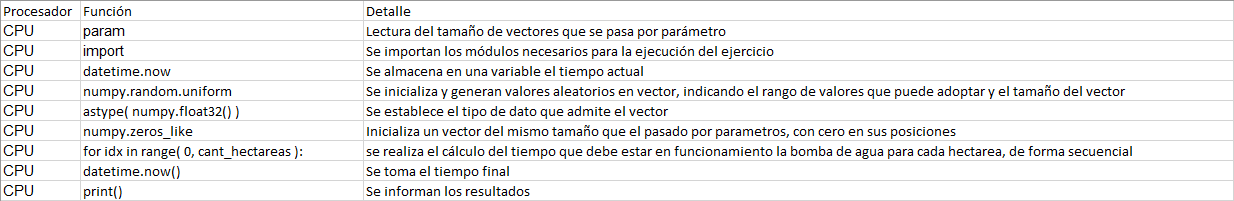

**5. Conclusiones**

*Repaso*

Tal como se puede observar en los tiempos arrojados por el ejercicio, representa una desventaja utilizar solamente una CPU para realizar una gran cantidad de cálculos, ya que los mismos se realizarán de forma secuencial, en lugar de realizarse en forma paralela como en la ejecución utilizando CPU + GPU. En el presente ejercicio, una operación para calcular las horas que debe estar en funcionamiento la bomba de agua no puede realizarse si previamente no finalizó la anterior, es decir, si se está calculando el resultado con los datos de la primera posicion de cada vector, no puede realizarse el cálculo utilizando la segunda posicion de cada uno, sino que se debe aguardar a que termine la primera.

Si trabajamos con vectores de pocas posiciones, la diferencia de tiempo no es tan evidente ya que son pocas operaciones las que deben realizarse, pero si trabajamos con una mayor cantidad de posiciones por vector, la diferencia de tiempo es notable.

*Lecciones aprendidas*

Este primer ejercicio realizado de forma secuencial me permitió comprobar la evidente diferencia que existe entre un entorno en el que solamente se trabaja con CPU, con un entorno en el que se trabaja con CPU + GPU. A su vez, queda claro que para el caso en que se requiera ejecutar una solución donde se deban realizar una gran cantidad de cálculos pesados, la utilización de un entorno que utiliza GPU representa una ventaja, ya que de lo contrario, la ejecución podría demorar tiempos inaceptables.

*Sugerencias para continuar con el ejercicio*

Una sugerencia que se propone es permitir al productor ingresar cada uno de los valores de las bombas eléctricas de agua que dispone así como también el requerimiento de agua que cada hectárea necesita.
Como segunda sugerencia, se propone ejecutar otro ciclo for cuya finalidad sea la de calcular la cantidad de tiempo total que que deben estar en funcionamiento todas las bombas de agua, para satisfacer la cantidad requerida por todas las hectáreas que se regarán.
Como última sugerencia para continuar el ejercicio puede ser adaptar el mismo a una solución de riego por goteo (ver EA3_Mendez_Gonzalo_39913544_Ejercicio2_CPU.ipynb). De esta manera, se verificaría que el tiempo que llevaría aplicar agua a una hectárea por métodos de riego tradicionales (método aplicado en el presente ejercicio) es considerablemente menor, con lo cual representa un método de riego mucho más eficiente e igualmente efectivo.

**6. Bibliografia**

[1] Documentacion PyCUDA: [Sitio web](https://documen.tician.de/pycuda/)

[2] Tutorial PyCUDA: [Sitio web](https://documen.tician.de/pycuda/tutorial.html)

[3] Documentacion Python: [Sitio web](https://docs.python.org/3/)

[4] Documentacion Numpy: [Sitio web](https://numpy.org)